In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt


In [3]:
file1 = 'C:/Users/karen/Downloads/kaggle material/bag of words/labeledTrainData.tsv'
file2 = 'C:/Users/karen/Downloads/kaggle material/bag of words/testData.tsv'
file3 = 'C:/Users/karen/Downloads/kaggle material/bag of words/unlabeledTrainData.tsv'


In [4]:
labeledTrain = pd.read_csv(file1,delimiter = '\t')

In [5]:
testData = pd.read_csv(file2,delimiter = '\t')

Data preview

In [6]:
labeledTrain.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
testData.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


# Data cleaning process

In [8]:
from bs4 import BeautifulSoup

In [9]:
import re # regular expression

In [10]:
from nltk.corpus import stopwords #stop_words 

In [11]:
#define a function to convert the review to text
def prepared_review(review,remove_stopwords):
    #remove html part
    raw_text = BeautifulSoup(review,'lxml').get_text()
    #remove non-letter part
    letters = re.sub('[^a-zA-Z]',' ',raw_text)
    words = letters.lower().split()
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if w not in stop_words]
    return (words)

In [12]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [41]:
X_train = []
for review in labeledTrain['review']:
    X_train.append(' '.join(prepared_review(review,True)))

X_test=[]
for review in testData['review']:
    X_test.append(' '.join(prepared_review(review,True)))

y_train = labeledTrain['sentiment']


features extraction and selection

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [43]:
#naive bayes model 
from sklearn.naive_bayes import MultinomialNB

In [44]:
#pipeline for process
from sklearn.pipeline import Pipeline
#GridSearchCV for grid search
from sklearn.grid_search import GridSearchCV

use CountVectorizer and Tfidfvectorizer for text features extraction


In [45]:

pip_count = Pipeline([('count_vec', CountVectorizer(analyzer='word')), ('mnb', MultinomialNB())])

pip_tfidf = Pipeline([('tfidf_vec', TfidfVectorizer(analyzer='word')), ('mnb', MultinomialNB())])

params_count = {'count_vec__binary':[True, False], 'count_vec__ngram_range':[(1, 1), (1, 2)], 'mnb__alpha':[0.1, 1.0, 10.0]}
params_tfidf = {'tfidf_vec__binary':[True, False], 'tfidf_vec__ngram_range':[(1, 1), (1, 2)], 'mnb__alpha':[0.1, 1.0, 10.0]}

gs_count = GridSearchCV(pip_count, params_count, cv=4, n_jobs=-1, verbose=1)
gs_tfidf = GridSearchCV(pip_tfidf, params_tfidf, cv=4, n_jobs=-1, verbose=1)


In [46]:
gs_count.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  1.8min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('count_vec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preproc...nizer=None, vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'count_vec__binary': [True, False], 'count_vec__ngram_range': [(1, 1), (1, 2)], 'mnb__alpha': [0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [47]:
print(gs_count.best_score_)
print(gs_count.best_params_) #figure out the best parameters for the model


0.88216
{'count_vec__binary': True, 'count_vec__ngram_range': (1, 2), 'mnb__alpha': 1.0}


In [48]:
count_y_predict = gs_count.predict(X_test)

In [49]:
gs_tfidf.fit(X_train, y_train)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  2.4min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf_vec', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tru...rue,
        vocabulary=None)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'tfidf_vec__binary': [True, False], 'tfidf_vec__ngram_range': [(1, 1), (1, 2)], 'mnb__alpha': [0.1, 1.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [50]:
print(gs_tfidf.best_score_)
print(gs_tfidf.best_params_)

0.88712
{'mnb__alpha': 0.1, 'tfidf_vec__binary': True, 'tfidf_vec__ngram_range': (1, 2)}


In [51]:
tfidf_y_predict = gs_tfidf.predict(X_test)

In [52]:
#for submission of the data
submission_count = pd.DataFrame({'id': testData['id'], 'sentiment': count_y_predict})

submission_tfidf= pd.DataFrame({'id': testData['id'], 'sentiment': tfidf_y_predict})


submission_count.to_csv('C:/Users/karen/Downloads/kaggle material/bag of words/submission_count.csv', index=False)
submission_tfidf.to_csv('C:/Users/karen/Downloads/kaggle material/bag of words/submission_tfidf.csv', index=False)

In [53]:
#visualize the result


# Train the model by using word2vec

In [54]:
#unlabeled train data
unlabeled = pd.read_csv(file3,delimiter = '\t',quoting=3)

In [55]:
unlabeled.head(10)

,id,review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was..."
1,"""45057_0""","""I saw this film about 20 years ago and rememb..."
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B..."
3,"""7161_0""","""I went to see this film with a great deal of ..."
4,"""43971_0""","""Yes, I agree with everyone on this site this ..."
5,"""36495_0""","""Jennifer Ehle was sparkling in \""Pride and Pr..."
6,"""49472_0""","""Amy Poehler is a terrific comedian on Saturda..."
7,"""36693_0""","""A plane carrying employees of a large biotech..."
8,"""316_0""","""A well made, gritty science fiction movie, it..."
9,"""32454_0""","""Incredibly dumb and utterly predictable story..."


In [56]:
import nltk.data


In [57]:
#use tokenizer of nltk to split the sentences of reviews
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [58]:
def review_to_sentences(review, tokenizer):
    raw_sentences = tokenizer.tokenize(review.strip())
    
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(prepared_review(raw_sentence, False))
    
    return (sentences)


In [59]:
corpora = []  
#create this for train word vec    
for review in unlabeled['review']:
    corpora += review_to_sentences(review, tokenizer)


C:\Users\karen\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\Users\karen\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\karen\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\Users\karen\Anaconda

In [60]:
# Set values for various parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 20   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words



# Training word2vec model

In [61]:
import gensim

In [62]:
from gensim.models import word2vec

model = word2vec.Word2Vec(corpora, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

model.init_sims(replace=True)

model_name = "C:/Users/karen/Downloads/kaggle material/bag of words/300features_20minwords_10context"
model.save(model_name)

check the similiarity we measure from the model

In [63]:
from gensim.models import Word2Vec
model = Word2Vec.load("C:/Users/karen/Downloads/kaggle material/bag of words/300features_20minwords_10context")
model.most_similar("money")


C:\Users\karen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('dollars', 0.5712018013000488),
 ('bucks', 0.5493204593658447),
 ('funds', 0.5272094011306763),
 ('ticket', 0.5269955992698669),
 ('profit', 0.5190430879592896),
 ('fee', 0.5066834688186646),
 ('cash', 0.5018608570098877),
 ('tax', 0.476310133934021),
 ('resources', 0.47289445996284485),
 ('effort', 0.4654087424278259)]

In [64]:
model.wv['bad']

array([ 0.04705627,  0.08819679, -0.00642708,  0.03267902,  0.04566995,
       -0.17866793,  0.11764432, -0.02518083, -0.09150013,  0.0657018 ,
       -0.08458803,  0.10498398, -0.01612334,  0.07059648, -0.00206516,
       -0.06180945,  0.11247218,  0.04332196,  0.08497001,  0.00034029,
       -0.02656468,  0.08041392,  0.06181143, -0.14000535, -0.04006502,
        0.04658644, -0.06101842, -0.05431207, -0.03660329, -0.04204968,
       -0.08719162, -0.00904565, -0.01805023, -0.02421436,  0.0866837 ,
        0.09520471,  0.00733788,  0.03681413,  0.05577415, -0.06304482,
        0.011404  ,  0.00894626,  0.07964405,  0.0521035 , -0.14025095,
        0.00435505,  0.03238562,  0.00310826,  0.02708534,  0.08137763,
        0.01227116,  0.00444751, -0.11418479, -0.02483306, -0.03242274,
       -0.01759001,  0.0315439 ,  0.03005558, -0.00191742, -0.06099946,
       -0.05640763, -0.02173805,  0.03484461,  0.02376217, -0.07034627,
        0.02022477, -0.01636348,  0.04234943,  0.00974975,  0.03

In [65]:
model.wv.vocab

{'watching': <gensim.models.keyedvectors.Vocab at 0x195ccd59e10>,
 'time': <gensim.models.keyedvectors.Vocab at 0x195cd6a9ba8>,
 'chasers': <gensim.models.keyedvectors.Vocab at 0x195cd6a9c50>,
 'it': <gensim.models.keyedvectors.Vocab at 0x195cd6a9be0>,
 'obvious': <gensim.models.keyedvectors.Vocab at 0x195cd6a9cf8>,
 'that': <gensim.models.keyedvectors.Vocab at 0x195cd6a9d68>,
 'was': <gensim.models.keyedvectors.Vocab at 0x195cd6a9dd8>,
 'made': <gensim.models.keyedvectors.Vocab at 0x195cd6a9e48>,
 'by': <gensim.models.keyedvectors.Vocab at 0x195cd6a9eb8>,
 'a': <gensim.models.keyedvectors.Vocab at 0x195cd6a9ef0>,
 'bunch': <gensim.models.keyedvectors.Vocab at 0x195cd6a9f60>,
 'of': <gensim.models.keyedvectors.Vocab at 0x195cd6a9fd0>,
 'friends': <gensim.models.keyedvectors.Vocab at 0x195cd808080>,
 'maybe': <gensim.models.keyedvectors.Vocab at 0x195cd8080f0>,
 'they': <gensim.models.keyedvectors.Vocab at 0x195cd808160>,
 'were': <gensim.models.keyedvectors.Vocab at 0x195cd8081d0>,
 's

# Visualized the word vectors

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\karen\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


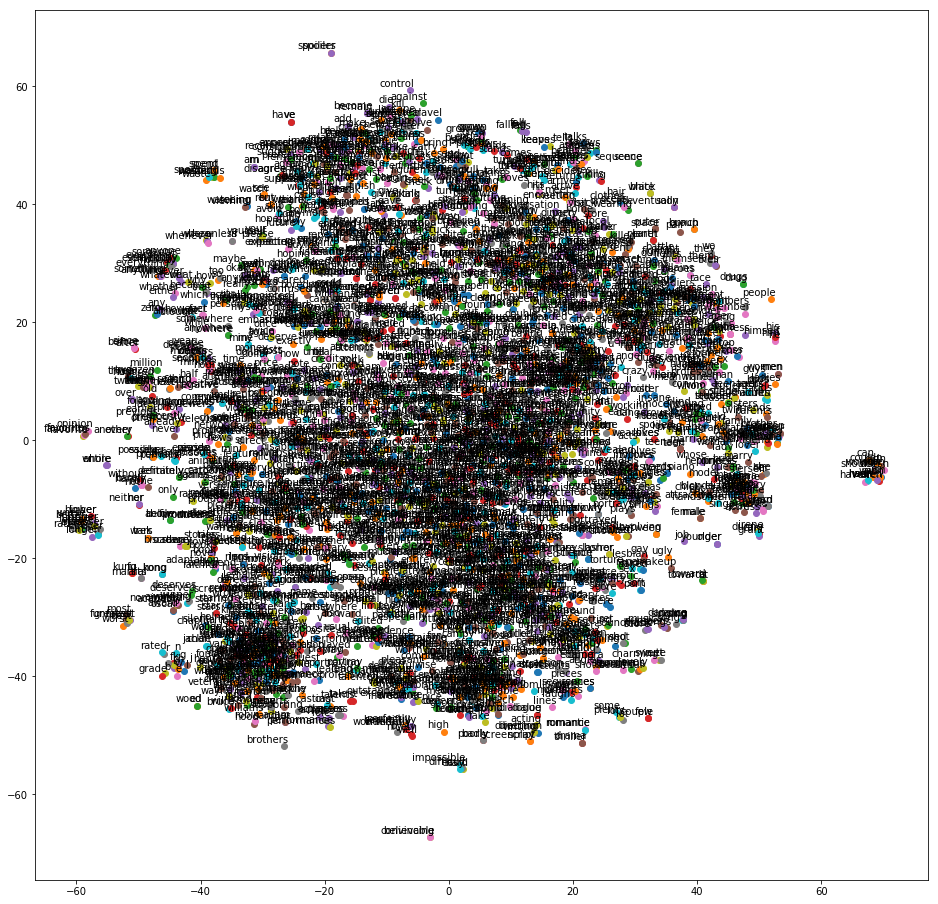

In [67]:
# a more selective model
model_3= Word2Vec(corpora, size=100, window=20, min_count=300, workers=4)
tsne_plot(model_3)

C:\Users\karen\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


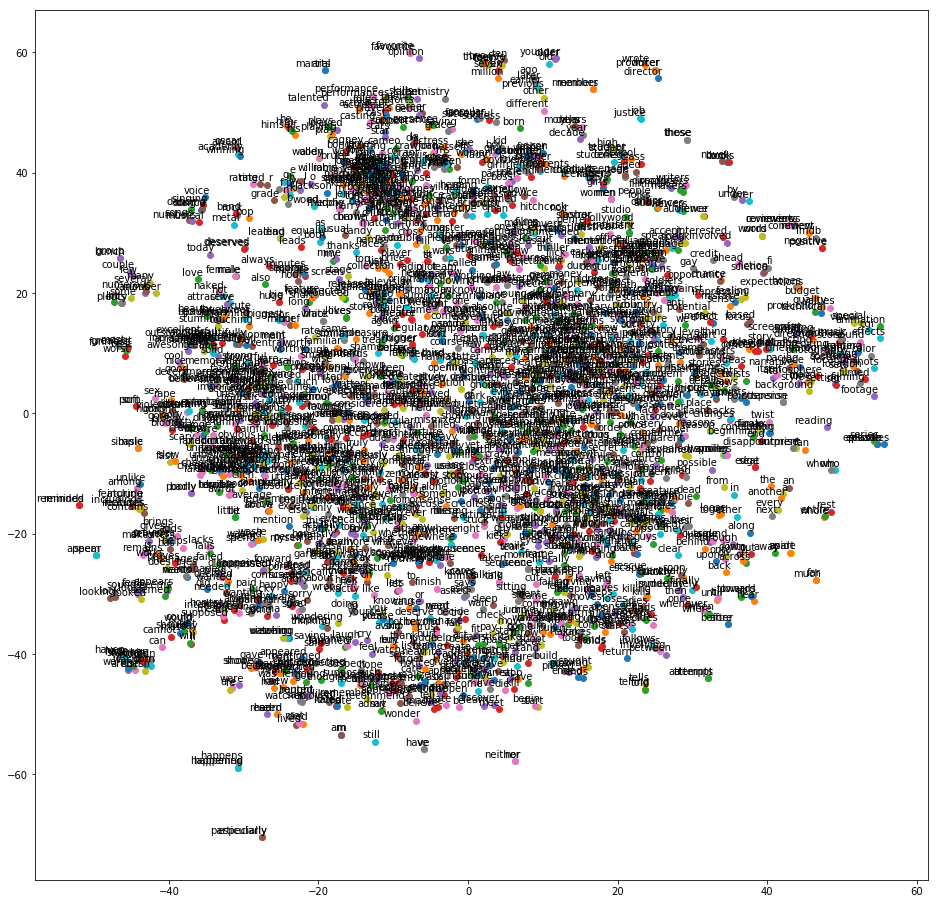

In [68]:
model_4= Word2Vec(corpora, size=100, window=20, min_count=500, workers=4)
tsne_plot(model_4)

C:\Users\karen\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


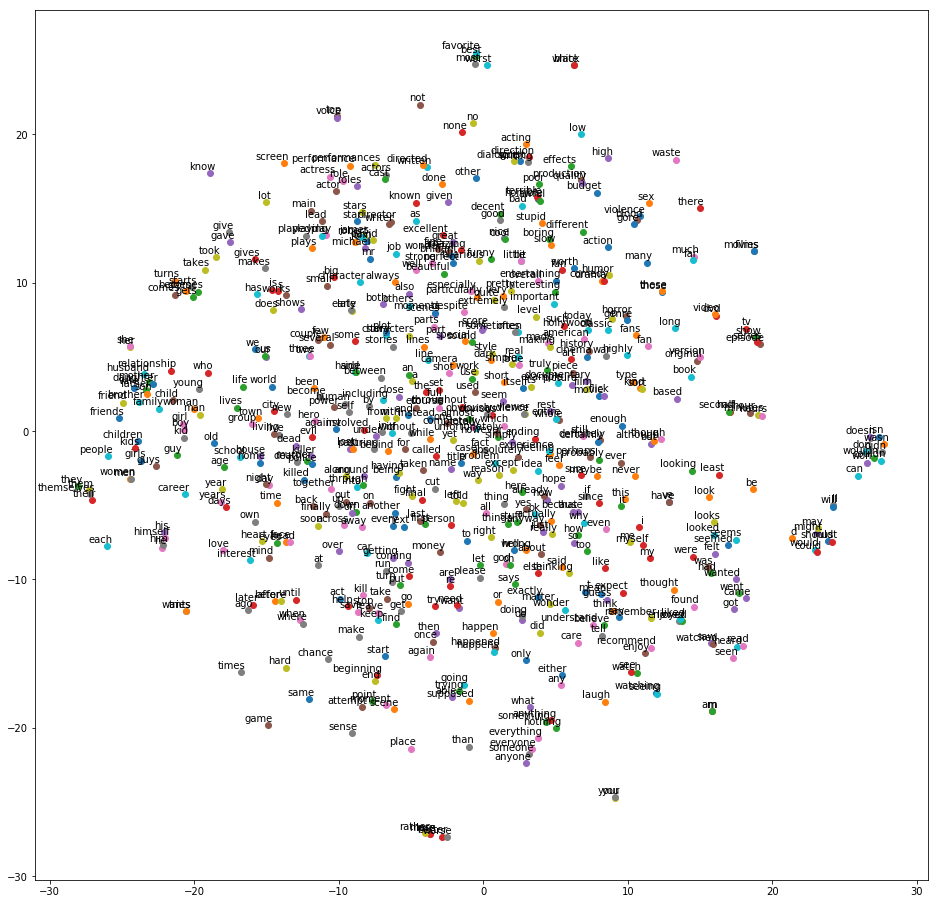

In [69]:
#when we make the model more selective, the plot would be easy to check similiarity of words
model_5= Word2Vec(corpora, size=100, window=20, min_count=2000, workers=4)
tsne_plot(model_5)

In [72]:
#preview on the vocabulary built on word2vec
print(model.wv.index2word[1:10])

['and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this']


In [73]:
#create a function to transfer word vectors into features vector
def makeFeatureVec(words, model, num_features):

    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.0

    index2word_set = set(model.wv.index2word) # remove duplicates

    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
            
    featureVec = np.divide(featureVec,nwords)
    return (featureVec)


def getAvgFeatureVecs(reviews, model, num_features):

    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")

    for review in reviews:
        reviewFeatureVecs[counter] = makeFeatureVec(review, model, num_features)
        
        counter += 1

    return (reviewFeatureVecs)

In [78]:
clean_train_reviews = []
for review in labeledTrain["review"]:
    clean_train_reviews.append( prepared_review( review, remove_stopwords=True ))

trainDataVecs = getAvgFeatureVecs( clean_train_reviews, model, num_features )

clean_test_reviews = []
for review in testData["review"]:
    clean_test_reviews.append( prepared_review( review, remove_stopwords=True ))

testDataVecs = getAvgFeatureVecs( clean_test_reviews, model, num_features )

C:\Users\karen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

gbc = GradientBoostingClassifier()

params_gbc = {'n_estimators':[10, 100, 500], 'learning_rate':[0.01, 0.1, 1.0], 'max_depth': [2, 3, 4]}
gs = GridSearchCV(gbc, params_gbc, cv=4, n_jobs=-1, verbose=1)

gs.fit(trainDataVecs, y_train)

print (gs.best_score_)
print (gs.best_params_)

result = gs.predict(testDataVecs)
# Write the test results 
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv( "C:/Users/karen/Downloads/kaggle material/bag of words/submission_w2v.csv", index=False, quoting=3)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 25.5min
